In [26]:
#Dataset from KNMI
#Average temperature
#Tallinn, Estonia
#Lat: 59.4N lon: 24.8E

import numpy as np
import pandas as pd
import os
import pylab
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal

#Reading in data from KNMI
os.chdir(r"C:\Users\Atlas\Desktop\Data_for_Python\Class_Assignments");
os.getcwd()


'C:\\Users\\Atlas\\Desktop\\Data_for_Python\\Class_Assignments'

In [27]:
q=Dataset ('vgdcnEN000026038.nc')
print (dataset.file_format)

NETCDF4_CLASSIC


In [28]:
print (q.variables.keys())

odict_keys(['time', 'TAVE'])


In [29]:
t=np.array(q.variables['time']) #time
T=np.array(q.variables['TAVE']) #average temperature
T[T==3e+33]=np.nan 
t = t[~np.isnan(T)]
T = T[~np.isnan(T)]
T.shape
print(T)


[ 1.54999995  1.60000002  1.20000005 ...,  7.5999999   9.89999962
  6.4000001 ]


<Figure size 1440x720 with 0 Axes>

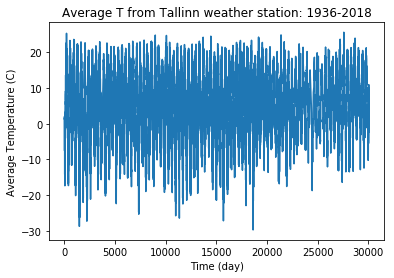

<Figure size 1440x720 with 0 Axes>

In [30]:
plt.plot(t,T)
plt.xlabel('Time (day)');plt.ylabel('Average Temperature (C)');
plt.title('Average T from Tallinn weather station: 1936-2018');
plt.figure(figsize=(20,10))

(0, 10000)

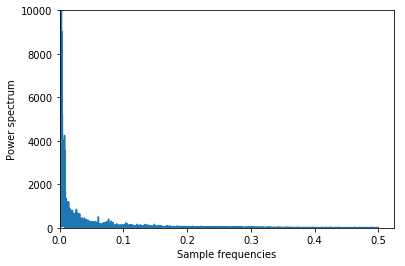

In [40]:
#Calculate the power spectrum of the time series

f, Pxx = signal.periodogram(T) # Daily periodicity
plt.plot(f,Pxx)
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');
plt.xlim(0,); plt.ylim(0,10000)

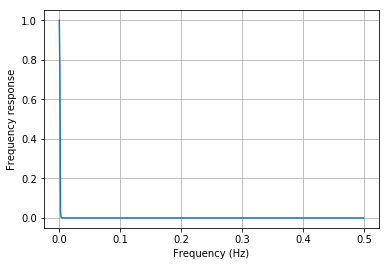

In [54]:
#Identify the dominant frequency and create a low pass filter to remove the seasonality

from scipy.signal import butter, lfilter
from scipy.signal import freqz
import matplotlib.pyplot as plt
nyq=0.5
f=0.001
b, a = butter(5,f/nyq, btype='low')      # low-pass filter, f/nyq to normalize the frequency with Nq;
# b and a are numerator and denominator of IIR filter (Infinite impulse response) as opposed to FIR
w, h = freqz(b, a)
# h is the frequency response and w is the normalized frequencies at which h is calculated

plt.plot((nyq / (1*np.pi)) * w, abs(h))

# abs(h) because h is complex, w is converted back into the sampling frequency to obtain the following plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency response')
plt.grid(True)

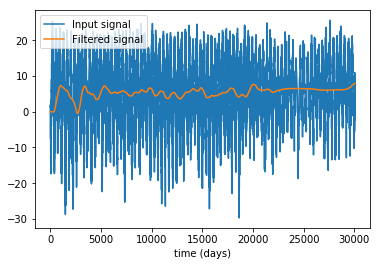

In [55]:
plt.figure()
plt.plot(t,T, label='Input signal')
y = lfilter(b, a, T)
#lfilter is a causal approach to filter signal only in forward direction, so there is a lag in phase with the original signal
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (days)')
plt.legend(loc='upper left')
plt.show()

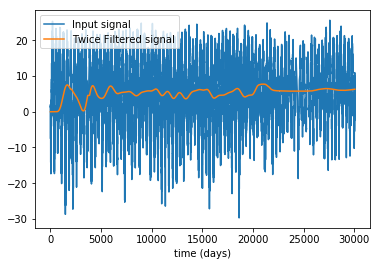

In [57]:
plt.figure()
plt.plot(t,T, label='Input signal')
y1 = lfilter(b, a, y)
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (days)')
plt.legend(loc='upper left')
plt.show()

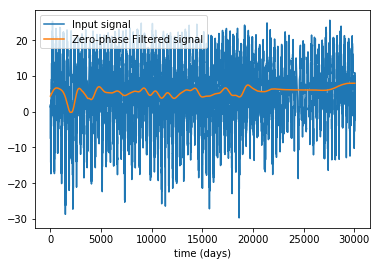

In [58]:
from scipy import signal
plt.figure()
plt.plot(t,T, label='Input signal')
y2 = signal.filtfilt(b, a, T)
#filtfilt is a non-causal approach to filter a signal forward and backward giving a zero-phase filtering 
#i.e. doesn't shift the signal in forward or backward direction as it filters
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (days)')
plt.legend(loc='upper left')
plt.show()

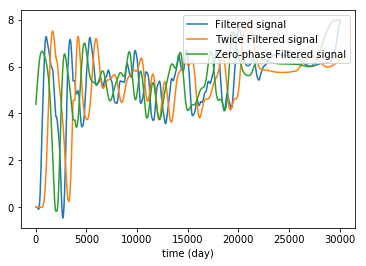

In [59]:
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper left')
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper left')
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper right')
plt.show()

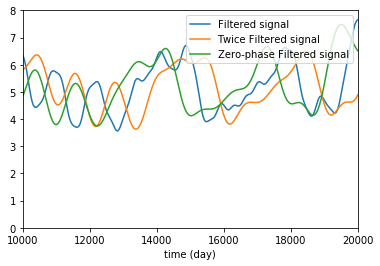

In [61]:
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper left')
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper left')
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper right')
plt.ylim([0,8]);plt.xlim([10000,20000])
plt.show()